### Surviving The Titanic

###### This notebook aims to predict factors that cause survival using a logistic regression model.

###### Importing the required modules

In [155]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc


In [156]:
df = pd.read_csv('train.csv')

In [157]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [158]:
df.set_index('PassengerId',inplace=True)

In [159]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [160]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### There are 687 missing values for Cabin so I will drop the whole column because the values cannot be replaced and it is not an important variable to predict survival

In [161]:
df.dropna(axis=1,inplace=True)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
dtypes: float64(1), int64(4), object(3)
memory usage: 62.6+ KB


#### EDA

In [163]:
col = ['Parch','Survived','Pclass','Sex']

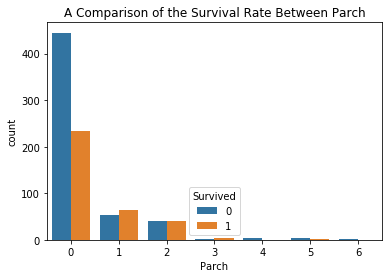

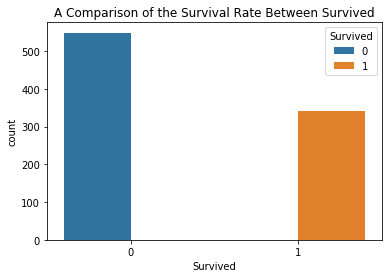

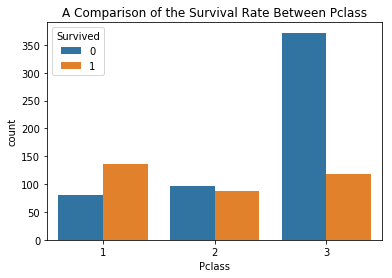

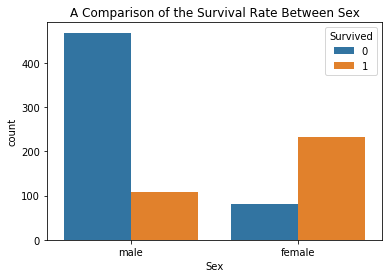

In [164]:
for i in df[col]:
    sns.countplot(i,data=df,hue='Survived')
    plt.title('A Comparison of the Survival Rate Between ' + i)
    plt.show()

###### From the eda we can see that women were more likely to survive than men. First class passengers were also more likely to survive.

In [165]:
df_dummy = pd.get_dummies(df,prefix_sep='_',columns=['Sex'],drop_first=True)

In [166]:
x = df_dummy[['Parch','Sex_male','Fare','Pclass','SibSp']]
y = df_dummy['Survived']

In [167]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [168]:
x_train.head()

,Parch,Sex_male,Fare,Pclass,SibSp
PassengerId,,,,,
332,0,1,28.5000,1,0
734,0,1,13.0000,2,0
383,0,1,7.9250,3,0
705,0,1,7.8542,3,1
814,2,0,31.2750,3,4


In [169]:
logreg = LogisticRegression(solver='lbfgs')
model = logreg.fit(x_train,y_train)

In [170]:
y_pred = model.predict(x_test)

In [171]:
accuracy_score(y_pred,y_test)*100

78.77094972067039

In [172]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       105
           1       0.76      0.70      0.73        74

   micro avg       0.79      0.79      0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [173]:
confusion_matrix(y_test,y_pred)

array([[89, 16],
       [22, 52]])

In [174]:
roc_auc_score(y_test,y_pred)

0.7751608751608752

In [175]:
fpr,tpr,thresholds = roc_curve(y_pred,y_test)

Text(0.5,1,'ROC-Curve')

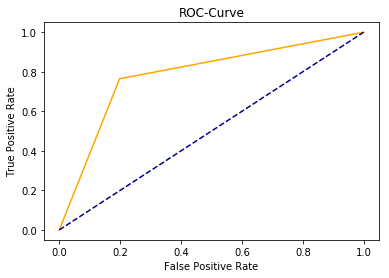

In [176]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-Curve')